In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math
from pandas.plotting import autocorrelation_plot

In [2]:
kappa = 4000

In [3]:
def calc_error_correction(arr, iter):
    binned_arr=np.copy(arr)
    error_est_arr = np.zeros(iter)
    for i in range(iter):
        M=binned_arr.size
        error_est_arr[i]=math.sqrt(np.sum((binned_arr-np.mean(binned_arr))**2)/(M*(M-1)))
        binned_arr=get_binned_array(binned_arr)
    return error_est_arr
  
def get_binned_array(arr):
    if arr.size%2==0:
        return 0.5*(arr[::2]+arr[1::2])
    else:
        return 0.5*(arr[:-1:2]+arr[1::2])

def calc_error_correction2(arr, bin_sizes):
    print(len(bin_sizes))
    error_est_arr = np.zeros(len(bin_sizes))
    for i, bin_size in enumerate(bin_sizes):
        binned_arr=get_binned_array2(arr, bin_size)
        M=binned_arr.size
        error_est_arr[i]=math.sqrt(np.sum((binned_arr-np.mean(binned_arr))**2)/(M*(M-1)))
    return error_est_arr

def get_binned_array2(arr, bin_size):
    bin_num=arr.size//bin_size
    binned_arr=np.zeros(bin_num)
    for i in range(bin_num):
        binned_arr[i]=np.mean(arr[i*bin_size:(i+1)*bin_size])
    return binned_arr

def auto_corr_fast(M):   
#   The autocorrelation has to be truncated at some point so there are enough
#   data points constructing each lag. Let kappa be the cutoff
    M = M - np.mean(M)
    N = len(M)
    fvi = np.fft.fft(M, n=2*N)
#   G is the autocorrelation curve
    G = np.real( np.fft.ifft( fvi * np.conjugate(fvi) )[:N] )
    G /= N - np.arange(N); G /= G[0]
    G = G[:kappa]
    return G

def auto_corr_faster(M):
#   The autocorrelation has to be truncated at some point so there are enough
#   data points constructing each lag. Let kappa be the cutoff
    M = M - np.mean(M)
    M = M[:kappa]
    N = len(M)
    fvi = np.fft.fft(M)
#   G is the autocorrelation curve
    G = (np.abs(fvi)**2)[0]
    #print((np.abs(fvi)**2))
    G /= np.var(M)
    return G

def calc_tau(M):
#   autocorr is the UNintegrated autocorrelation curve
    autocorr = auto_corr2(M)    
#   tau = 1 + 2*sum(G)
    return 1 + 2*np.sum(autocorr), autocorr

def auto_corr(M,t):
    t_max=len(M)
    return np.sum(M[:t_max-t]*M[t:])/(t_max-t) - \
           (np.sum(M[:t_max-t])/(t_max-t))*np.sum(M[t:])/(t_max-t)
    
def corr_func_katz(M,t):
    #return (np.mean(M[:-t]*M[t:]) - np.mean(M[:-t])*np.mean(M[t:]))/(np.var(M))
    return (np.mean(M[:-t]*M[t:]) - np.mean(M)*np.mean(M))/(np.var(M))

def plot_corr_func(M):
    auto_corr_func = np.zeros(int(M.size/10))
    for t in range(int(M.size/10)):
        print(t)
        auto_corr_func[t]=corr_func_katz(M,t)
    plt.plot(auto_corr_func)
    plt.show()
    
def calc_tau2(M):
    summation=0
    for t in range(0,kappa-1):
        summation+=auto_corr(M,t)
    return summation/np.var(M)

def auto_corr_wiki(M):
    n=M.size
    auto_corr=np.zeros(n)
    mu=np.mean(M)
    sigma2=np.var(M)
    for k in range(n):
        auto_corr[k] = np.sum((M[:n-k]-mu)*(M[k:]-mu)) / sigma2 / (n-k)
        print(str(k)+' '+str(auto_corr[k]))
    return auto_corr

def auto_corr2(M):
#   The autocorrelation has to be truncated at some point so there are enough
#   data points constructing each lag. Let kappa be the cutoff
    auto_corr = np.zeros(kappa-1)
    mu = np.mean(M)
    for s in range(0,kappa-1):
        auto_corr[s] = np.mean( (M[:-s]-mu) * (M[s:]-mu) ) / np.var(M)
    return auto_corr

done reading file!


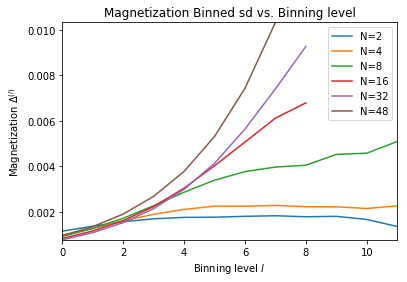

In [40]:
L=5
h=0.0
h_ex=0.0
mech='false'
obs='Magnetization'
folderName='correlation_test'
x=1.0
#T=1.46976365365745
#T=1.4681055099081104
T=1.4998575151938878
#T=1.4998575151938878
#T=1.7638839354959759
fname='C:\\path\\to\\project\\project6\\analysis\\'+folderName+'\\table_'+str(L)+'_'+str(L)+'_'+str(x)+'_'+str(h)+'_'+str(h_ex)+'_'+str(T)+'_'+mech+'_t.txt'
y = pd.read_csv(fname, sep="\t", error_bad_lines=False, index_col='index', comment='#')
print('done reading file!')
arr=np.abs(y[obs].values)
arr=arr[-int(arr.size/2):]
#print(arr.size)

#auto_corr_curve=auto_corr_wiki(arr)
#plt.plot(auto_corr_curve)
#plt.show()

#plt.acorr(arr,usevlines=False)
#plt.show()
#autocorrelation_plot(arr)
#plt.show()
#print(arr.size)
#plot_corr_func(arr)

#auto_corr_func = np.zeros(3000)
'''
for t in range(3000):
    auto_corr_func[t]=auto_corr(arr,t)
plt.plot(auto_corr_func)
plt.show()

tau=0
while (abs(5*tau-kappa)>1):
    tau, curve = calc_tau(arr)
    print((tau, 5*tau, kappa))
    if (5*tau>kappa):
        kappa+=1
    else:
        kappa-=1

print('tau=%s'%(tau))
'''
#plt.plot(curve)
#plt.show()
#plt.plot(np.abs(arr),'.')
#-1+int(0.5*math.log2(arr.size))
#2+int(math.log2(arr.size/10.0))

#last_level=8+int(0.5*math.log2(arr.size))
#print('number of bins: %s'%int(arr.size*0.5**last_level))
#error_corrections=calc_error_correction(arr,last_level)
#iter_list=[1,2,4,8,16,32,64,128,160,192,224,256,320,384,448,512,1024]
#error_corrections=calc_error_correction2(arr,iter_list)


#plot binning analysis:
Ns=[2,4,8,16,32,48]
last_levels={2:12,4:12,8:12
             ,16:9,32:9,48:8}
for N in Ns:
    fname='2dising_%s.txt'%N
    y = pd.read_csv(fname, sep="\t", error_bad_lines=False, index_col='step', comment='#')
    arr=np.abs(y[obs].values)
    last_level=4+int(0.5*math.log2(arr.size))
    last_level=int(math.log2(arr.size/N))
    last_level=last_levels[N]
    error_corrections=calc_error_correction(arr,last_level)
    plt.plot(error_corrections,'-',label='N=%s'%N)

# Ls=[2,3,4,5,6,7,8]
# T=1.4998575151938878
# for l in Ls:
#     y = pd.read_csv(fname, sep="\t", error_bad_lines=False, index_col='index', comment='#')
#     arr=np.abs(y[obs].values)
#     arr=arr[-int(arr.size/2):]
#     last_level=int(math.log2(arr.size/32))
#     error_corrections=calc_error_correction(arr,last_level)
#     plt.plot(error_corrections,'-',label='L=%s'%l)
    
    
# last_level=int(math.log2(arr.size/32))

# error_corrections=calc_error_correction(arr,last_level)
# plt.plot(error_corrections,'-')

# print('tau:')
# print(0.5*((error_corrections/error_corrections[0])**2 - 1))
#plt.plot(error_corrections,'.')
#plt.gca().set_xscale('log',basex=2)
plt.title('%s Binned sd vs. Binning level'%obs)
#plt.title('%s Binned sd vs. bin size '%obs)
plt.xlabel(r'Binning level $l$')
#plt.xlabel('bin size')
plt.ylabel(r'%s $\Delta^{(l)}$'%obs)
plt.legend()
#plt.grid(b=True, which='both', axis='y')
plt.margins(0)


#plt.show.hist(arr,bins=50)
plt.savefig('..\\figures\\binning_fig_new_seed2.png',dpi=400)
plt.show()